# Numpy库




## 为什么要用 Numpy

### 1、低效的 Python for循环

【例】求 100万 个数的倒数

In [2]:
def compute_reciprocals(values):
    res = []
    for value in values:      # 每遍历到一个元素，就要判断其类型，并查找适用于该数据类型的正确函数
        res.append(1/value)
    return res


values = list(range(1, 1000000))
%timeit compute_reciprocals(values)

133 ms ± 3.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


%timeit: ipython中统计运行时间的魔术方法（多次运行取平均值）

In [3]:
import numpy as np

values = np.arange(1, 1000000)
%timeit 1/values

5.4 ms ± 81.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**实现相同计算，Numpy的运行速度是Python循环的25倍，产生了质的飞跃**




### 2、Numpy 为什么如此高效

**Numpy 是由C语言编写的**

**1）编译型语言 VS 解释型语言**

C语言执行时，对代码进行整体编译，速度更快

**2）连续单一类型存储 VS 分散多变类型存储**

（1）Numpy数组内的数据类型必须是统一的，如全部是浮点型，而Python列表支持任意类型数据的填充

（2）Numpy数组内的数据**连续存储在内存中**，而Python列表的数据**分散在内存中**

**这种存储结构，与一些更加高效的底层处理方式更加的契合**

**3）多线程 VS 线程锁**

Python语言执行时有线程锁，无法实现真正的多线程并行，而C语言可以




### 3、什么时候用 Numpy

**在数据处理的过程中，遇到使用“Python for循环”实现一些向量化、矩阵化操作的时候，要优先考虑用 Numpy**

   如：1.两个向量的点乘

    2.矩阵乘法
    
    
    
## Numpy 数组的创建

### 1、从列表开始创建

In [4]:
import numpy as np

x = np.array([1, 2, 3, 4, 5])
print(x)
print(type(x))
print(type(x[0]))
print(x.shape)

[1 2 3 4 5]
<class 'numpy.ndarray'>
<class 'numpy.int32'>
(5,)


- 设置数组的数据类型

In [6]:
x = np.array([1, 2, 3, 4, 5], dtype='float32')
print(x)
print(type(x[0]))

[1. 2. 3. 4. 5.]
<class 'numpy.float32'>


- 二维数组

In [7]:
x = np.array([[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9]])

print(x)
print(x.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
(3, 3)


### 2、从头创建数组

**（1）创建长度为5的数组，值都为0**

In [8]:
np.zeros(5, dtype=int)

array([0, 0, 0, 0, 0])

**（2）创建一个2*4的浮点型数组，值都为1**

In [10]:
np.ones((2, 4), dtype=float)

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.]])

**（3）创建一个3*5的数组，值都为8.8**

In [11]:
np.full((3, 5), 8.8)

array([[8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8],
       [8.8, 8.8, 8.8, 8.8, 8.8]])

**（4）创建一个3*3的单位矩阵**

In [12]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**（5）创建一个线性序列数组，从1开始，到15结束，步长为2**

In [13]:
np.arange(1, 15, 2)

array([ 1,  3,  5,  7,  9, 11, 13])

**（6）创建一个4个元素的数组，这四个数均匀的分配到0~1**

In [15]:
np.linspace(0, 1, 4)

array([0.        , 0.33333333, 0.66666667, 1.        ])

**（7）创建一个10个元素的数组，形成1~10^9的等比数列**

In [16]:
np.logspace(0, 9, 10)

array([1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06, 1.e+07,
       1.e+08, 1.e+09])

**（8）创建一个3*3的，在0~1之间均匀分布的随机数构成的数组**

In [17]:
np.random.random((3, 3))

array([[0.81329616, 0.47392511, 0.20581273],
       [0.90448529, 0.39001296, 0.68749765],
       [0.01270072, 0.01401872, 0.50123724]])

**（9）创建一个3*3的，均值为0，标准差为1的随机数构成的数组**

In [18]:
np.random.normal(0, 1, (3, 3))

array([[-0.08827089,  0.08724052, -0.7610242 ],
       [ 0.9560256 ,  0.06007075,  0.54775141],
       [-0.98057011,  0.15378384,  2.22919817]])

**（10）创建一个3*3的，在[0,10)之间随机整数构成的数组**

In [19]:
np.random.randint(0, 10, (3, 3))

array([[2, 9, 9],
       [9, 3, 1],
       [6, 2, 5]])

**（11）随机重排列**

In [20]:
x = np.array([10, 20, 30, 40])
np.random.permutation(x)         # 生产新列表

array([20, 40, 10, 30])

In [21]:
print(x)
np.random.shuffle(x)             # 修改原列表
print(x)

[10 20 30 40]
[20 40 10 30]


**（12）随机采样**

- 按指定形状采样

In [22]:
x = np.arange(10, 25, dtype = float)
np.random.choice(x, size=(4, 3))

array([[21., 18., 23.],
       [21., 22., 16.],
       [24., 17., 13.],
       [23., 18., 12.]])

- 按概率采样

In [23]:
np.random.choice(x, size=(4, 3), p=x/np.sum(x))

array([[20., 20., 21.],
       [19., 21., 21.],
       [19., 10., 20.],
       [10., 11., 12.]])

## Numpy数组的性质

### 1、数组的属性

In [24]:
x = np.random.randint(10, size=(3,4))
x

array([[4, 9, 6, 5],
       [5, 7, 1, 3],
       [1, 2, 0, 1]])

In [25]:
# 数组的形状
x.shape

(3, 4)

In [26]:
# 数组的维度ndim
x.ndim

2

In [27]:
y = np.arange(10)
y.ndim

1

In [28]:
# 数组的大小
x.size

12

In [29]:
# 数组的数据类型
x.dtype

dtype('int32')

### 2、数组索引

In [30]:
# 一维数组的索引
x1 = np.arange(10)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
x1[0]

0

In [32]:
x1[5]

5

In [33]:
x1[-1]

9

In [34]:
# 多维数组的索引————以二维为例
x2 = np.random.randint(0, 20, (2, 3))
x2

array([[18, 13, 10],
       [19, 13,  1]])

In [35]:
x2[0, 0]

18

In [36]:
x2[1][1]

13

**注意：numpy数组的数据类型是固定的，向词汇表整型数组插入一个浮点值，浮点值会向下取整**

In [37]:
x2[1, 2] = 1.618

In [38]:
x2

array([[18, 13, 10],
       [19, 13,  1]])

### 3、数组的切片

In [39]:
# 一维数组————跟列表一样
x1 = np.arange(10)
x1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [40]:
x1[:3]

array([0, 1, 2])

In [41]:
x1[3:]

array([3, 4, 5, 6, 7, 8, 9])

In [42]:
x1[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [43]:
# 多维数组————以二维为例
x2 = np.random.randint(20, size=(3,4))
x2

array([[10, 18,  8, 15],
       [11, 19,  8, 12],
       [ 1, 17, 16, 17]])

In [44]:
x2[:2, :3]

array([[10, 18,  8],
       [11, 19,  8]])

In [45]:
x2[:2, 0:3:2]       # 前两行，前三列（每隔一列）

array([[10,  8],
       [11,  8]])

In [46]:
x2[::-1, ::-1]

array([[17, 16, 17,  1],
       [12,  8, 19, 11],
       [15,  8, 18, 10]])

In [47]:
# 获取数组的行和列
x3 = np.random.randint(20, size=(3,4))
x3

array([[18, 15, 13,  6],
       [19,  0,  8,  5],
       [ 0,  0,  1, 19]])

In [48]:
x3[1, :]

array([19,  0,  8,  5])

In [49]:
x3[1]

array([19,  0,  8,  5])

In [50]:
x3[:, 2]

array([13,  8,  1])

In [51]:
# 切片获取的是视图，而非副本
x4 = np.random.randint(20, size=(3,4))
x4

array([[ 6, 10, 13, 12],
       [ 2,  7, 15, 11],
       [13, 18, 15, 14]])

In [52]:
x5 = x4[:2, :2]
x5

array([[ 6, 10],
       [ 2,  7]])

**注意：视图元素发生修改，则原数组亦发生相应修改**

In [53]:
x5[0, 0] = 0
x5

array([[ 0, 10],
       [ 2,  7]])

In [54]:
x4

array([[ 0, 10, 13, 12],
       [ 2,  7, 15, 11],
       [13, 18, 15, 14]])

**修改切片的安全方式：copy**

In [55]:
x4 = np.random.randint(20, size=(3,4))
x4

array([[ 1, 19, 15, 13],
       [10,  3, 10,  4],
       [13, 16,  9, 19]])

In [56]:
x6 = x4[:2, :2].copy()
x6

array([[ 1, 19],
       [10,  3]])

In [57]:
x6[0, 0] = 0
x6

array([[ 0, 19],
       [10,  3]])

In [58]:
x4

array([[ 1, 19, 15, 13],
       [10,  3, 10,  4],
       [13, 16,  9, 19]])

### 4、数组的变形

In [59]:
x5 = np.random.randint(0, 10, (12,))
x5

array([8, 5, 6, 7, 1, 0, 9, 9, 5, 5, 0, 7])

In [60]:
x5.shape

(12,)

In [61]:
x6 = x5.reshape(3, 4)
x6

array([[8, 5, 6, 7],
       [1, 0, 9, 9],
       [5, 5, 0, 7]])

In [62]:
x5

array([8, 5, 6, 7, 1, 0, 9, 9, 5, 5, 0, 7])

In [63]:
# reshape返回的也是视图
x6[0, 0] = 0
x5

array([0, 5, 6, 7, 1, 0, 9, 9, 5, 5, 0, 7])

In [65]:
x7 = x5.reshape(12,1)
x7

array([[0],
       [5],
       [6],
       [7],
       [1],
       [0],
       [9],
       [9],
       [5],
       [5],
       [0],
       [7]])

In [67]:
x8 = x5.reshape(1,12)
x8

array([[0, 5, 6, 7, 1, 0, 9, 9, 5, 5, 0, 7]])

In [68]:
# 一维向量转行向量
x9 = x5.reshape(1, x5.shape[0])
x9

array([[0, 5, 6, 7, 1, 0, 9, 9, 5, 5, 0, 7]])

In [69]:
x10 = x5[np.newaxis, :]
x10

array([[0, 5, 6, 7, 1, 0, 9, 9, 5, 5, 0, 7]])

In [70]:
# 一维向量转列向量
x11 = x5.reshape(x5.shape[0], 1)
x11

array([[0],
       [5],
       [6],
       [7],
       [1],
       [0],
       [9],
       [9],
       [5],
       [5],
       [0],
       [7]])

In [71]:
x12 = x5[:, np.newaxis]
x12

array([[0],
       [5],
       [6],
       [7],
       [1],
       [0],
       [9],
       [9],
       [5],
       [5],
       [0],
       [7]])

In [72]:
# 多维向量转一维向量
x6 = np.random.randint(0, 10, (3, 4))
x6

array([[2, 4, 3, 3],
       [8, 8, 6, 9],
       [4, 1, 2, 2]])

In [73]:
# flatten 返回的是副本
x13 = x6.flatten()
x13

array([2, 4, 3, 3, 8, 8, 6, 9, 4, 1, 2, 2])

In [74]:
x13[0] = 0
x6

array([[2, 4, 3, 3],
       [8, 8, 6, 9],
       [4, 1, 2, 2]])

In [75]:
# ravel 返回的是视图
x14 = x6.ravel()
x14

array([2, 4, 3, 3, 8, 8, 6, 9, 4, 1, 2, 2])

In [77]:
x14[0] = 0
x6

array([[0, 4, 3, 3],
       [8, 8, 6, 9],
       [4, 1, 2, 2]])

In [78]:
# reshape 返回的是视图
x15 = x6.reshape(-1)
x15

array([0, 4, 3, 3, 8, 8, 6, 9, 4, 1, 2, 2])

In [79]:
x15[0] = 9
x6

array([[9, 4, 3, 3],
       [8, 8, 6, 9],
       [4, 1, 2, 2]])

### 5、数组的拼接

In [80]:
x1 = np.array([[1, 2, 3],
              [4, 5, 6]])
x2 = np.array([[7, 8, 9],
              [0, 1, 2]])

In [81]:
# 水平拼接————非视图
x3 = np.hstack([x1, x2])     # horizontal 水平的
x3

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 0, 1, 2]])

In [82]:
x3[0][0] = 0
x1

array([[1, 2, 3],
       [4, 5, 6]])

In [83]:
x4 = np.c_[x1, x2]        # column 纵拼
x4

array([[1, 2, 3, 7, 8, 9],
       [4, 5, 6, 0, 1, 2]])

In [85]:
x4[0][0] = 0
x1

array([[1, 2, 3],
       [4, 5, 6]])

In [86]:
# 垂直拼接————非视图
x1 = np.array([[1, 2, 3],
              [4, 5, 6]])
x2 = np.array([[7, 8, 9],
              [0, 1, 2]])

In [87]:
x5 = np.vstack([x1, x2])        # vertical 垂直的
x5

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2]])

In [88]:
x6 = np.r_[x1, x2]              # row 横拼
x6

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 1, 2]])

### 6、数组的分裂

In [89]:
# split 的用法
x6 = np.arange(10)
x6

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [90]:
x1, x2, x3 = np.split(x6, [2, 7])
print(x1, x2, x3)

[0 1] [2 3 4 5 6] [7 8 9]


In [91]:
# hsplit 的用法
x7 = np.arange(1, 26).reshape(5, 5)
x7

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [92]:
# 水平分割
right, middle, left = np.hsplit(x7, [2, 4])
print('right:\n', right)
print('middle:\n', middle)
print('left:\n', left)

right:
 [[ 1  2]
 [ 6  7]
 [11 12]
 [16 17]
 [21 22]]
middle:
 [[ 3  4]
 [ 8  9]
 [13 14]
 [18 19]
 [23 24]]
left:
 [[ 5]
 [10]
 [15]
 [20]
 [25]]


In [93]:
# vsplit 的用法
x7 = np.arange(1, 26).reshape(5, 5)
x7

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [94]:
# 垂直分割
upper, middle, lower = np.vsplit(x7, [2, 4])
print('upper:\n', upper)
print('middle:\n', middle)
print('lower:\n', lower)

upper:
 [[ 1  2  3  4  5]
 [ 6  7  8  9 10]]
middle:
 [[11 12 13 14 15]
 [16 17 18 19 20]]
lower:
 [[21 22 23 24 25]]


## Numpy 四大运算

### 1）向量化运算

#### 1、与数字的加减乘除等

In [95]:
x1 = np.arange(1, 6)
x1

array([1, 2, 3, 4, 5])

In [96]:
print('x1+5', x1+5)
print('x1-5', x1-5)
print('x1*5', x1*5)
print('x1/5', x1/5)

x1+5 [ 6  7  8  9 10]
x1-5 [-4 -3 -2 -1  0]
x1*5 [ 5 10 15 20 25]
x1/5 [0.2 0.4 0.6 0.8 1. ]


In [97]:
print('-x1', -x1)
print('x1**2', x1**2)
print('x1//2', x1//2)
print('x1%2', x1%2)

-x1 [-1 -2 -3 -4 -5]
x1**2 [ 1  4  9 16 25]
x1//2 [0 1 1 2 2]
x1%2 [1 0 1 0 1]


#### 2、绝对值、三角函数、指数、对数

In [99]:
# 绝对值
x2 = np.array([1, -1, 2, -2, 0])
x2

array([ 1, -1,  2, -2,  0])

In [100]:
abs(x2)

array([1, 1, 2, 2, 0])

In [101]:
np.abs(x2)

array([1, 1, 2, 2, 0])

In [102]:
# 三角函数
theta = np.linspace(0, np.pi, 3)
theta

array([0.        , 1.57079633, 3.14159265])

In [103]:
print('sin(theta)', np.sin(theta))
print('cos(theta)', np.cos(theta))
print('tan(theta)', np.tan(theta))

sin(theta) [0.0000000e+00 1.0000000e+00 1.2246468e-16]
cos(theta) [ 1.000000e+00  6.123234e-17 -1.000000e+00]
tan(theta) [ 0.00000000e+00  1.63312394e+16 -1.22464680e-16]


In [105]:
x = [1, 0, -1]
print('arcsin(theta)', np.arcsin(x))
print('arccos(theta)', np.arccos(x))
print('arctan(theta)', np.arctan(x))

arcsin(theta) [ 1.57079633  0.         -1.57079633]
arccos(theta) [0.         1.57079633 3.14159265]
arctan(theta) [ 0.78539816  0.         -0.78539816]


In [106]:
# 指数运算
x = np.arange(3)
x

array([0, 1, 2])

In [107]:
np.exp(x)

array([1.        , 2.71828183, 7.3890561 ])

In [108]:
# 对数运算
x = np.array([1, 2, 4, 8, 10])
print('ln(x)', np.log(x))
print('log2(x)', np.log2(x))
print('log10(x)', np.log10(x))

ln(x) [0.         0.69314718 1.38629436 2.07944154 2.30258509]
log2(x) [0.         1.         2.         3.         3.32192809]
log10(x) [0.         0.30103    0.60205999 0.90308999 1.        ]


#### 3、两个数组的运算

In [111]:
x1 = np.arange(1, 6)
x1

array([1, 2, 3, 4, 5])

In [112]:
x2 = np.arange(6, 11)
x2

array([ 6,  7,  8,  9, 10])

In [113]:
print('x1+x2:', x1+x2)
print('x1-x2:', x1-x2)
print('x1*x2:', x1*x2)
print('x1/x2:', x1/x2)

x1+x2: [ 7  9 11 13 15]
x1-x2: [-5 -5 -5 -5 -5]
x1*x2: [ 6 14 24 36 50]
x1/x2: [0.16666667 0.28571429 0.375      0.44444444 0.5       ]


### 2）矩阵运算

In [114]:
x = np.arange(9).reshape(3, 3)
x

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [115]:
# 矩阵的转置
y = x.T
y

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [116]:
# 矩阵乘法
x = np.array([[1, 0],
             [1, 1]])
y = np.array([[0, 1],
             [1, 1]])

In [117]:
x.dot(y)

array([[0, 1],
       [1, 2]])

In [118]:
np.dot(x, y)             # 运算快得多

array([[0, 1],
       [1, 2]])

In [119]:
y.dot(x)

array([[1, 1],
       [2, 1]])

In [120]:
np.dot(y, x)

array([[1, 1],
       [2, 1]])

**注意跟x*y的区别**

In [121]:
x*y             # 对应位置相乘

array([[0, 0],
       [1, 1]])

### 3）广播运算

In [122]:
x = np.arange(3).reshape(1, 3)
x

array([[0, 1, 2]])

In [123]:
x + 5

array([[5, 6, 7]])

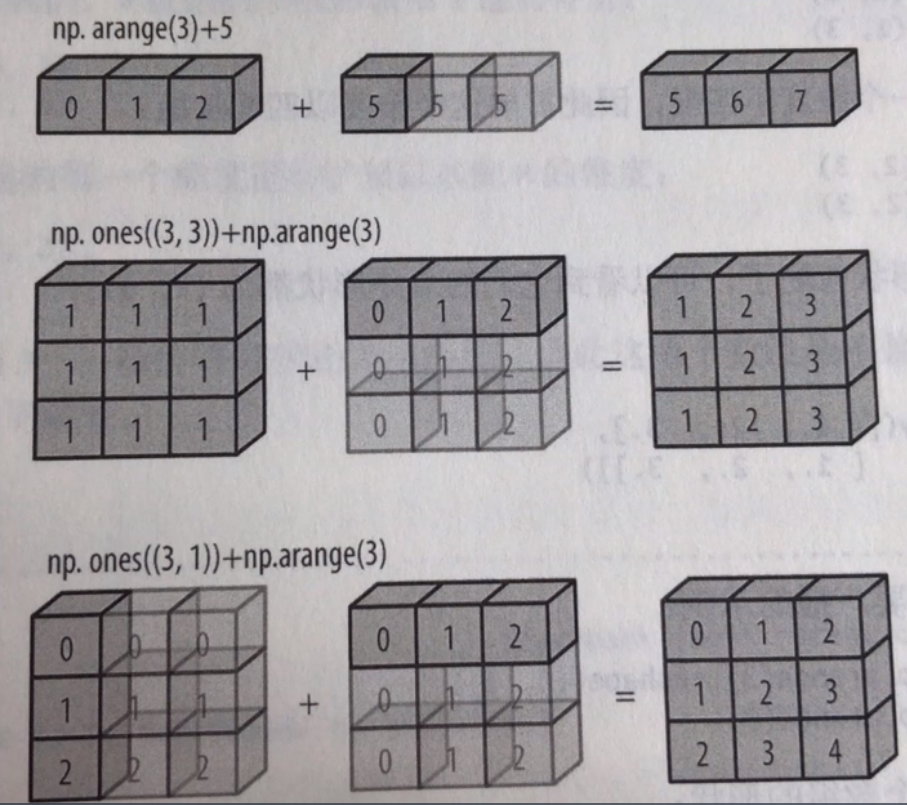

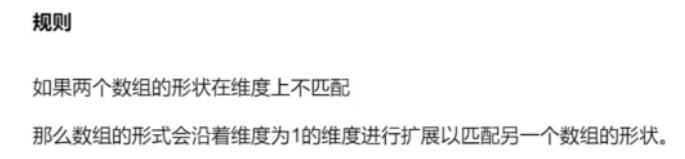

In [124]:
x1 = np.ones((3, 3))
x1

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [125]:
x2 = np.arange(3).reshape(1, 3)
x2

array([[0, 1, 2]])

In [126]:
x1 + x2

array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

In [129]:
x3 = np.logspace(1, 10, 10, base=2).reshape(2, 5)
x3

array([[   2.,    4.,    8.,   16.,   32.],
       [  64.,  128.,  256.,  512., 1024.]])

In [130]:
x4 = np.array([[1, 2, 4, 8, 16]])
x4

array([[ 1,  2,  4,  8, 16]])

In [131]:
x3/x4

array([[ 2.,  2.,  2.,  2.,  2.],
       [64., 64., 64., 64., 64.]])

In [132]:
x5 = np.arange(3).reshape(3, 1)
x5

array([[0],
       [1],
       [2]])

In [134]:
x6 = np.arange(3).reshape(1, 3)
x6

array([[0, 1, 2]])

In [135]:
x5 + x6

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 4）比较运算和掩码

In [136]:
# 比较运算
x1 = np.random.randint(100, size=(10,10))
x1

array([[12, 94, 70, 85, 57, 41, 60, 12, 39, 14],
       [18, 95, 65, 38, 57, 66, 38, 37, 88,  9],
       [33, 44, 96, 33, 38, 98, 67, 59, 33, 54],
       [60, 95, 15, 86, 24, 80, 77,  1, 38, 12],
       [80, 54, 14, 91, 80, 20, 70,  1, 53, 91],
       [ 0, 97, 29, 11, 63, 73, 73, 64, 28, 96],
       [35, 62, 20, 44, 15, 22, 20, 35, 89, 90],
       [91, 23, 82, 26, 64, 88, 77, 45, 29, 41],
       [33, 60, 86, 77, 38,  1, 50, 45, 83, 50],
       [73, 94, 81, 70, 84, 95, 57, 36, 32, 14]])

In [137]:
x1 > 50

array([[False,  True,  True,  True,  True, False,  True, False, False,
        False],
       [False,  True,  True, False,  True,  True, False, False,  True,
        False],
       [False, False,  True, False, False,  True,  True,  True, False,
         True],
       [ True,  True, False,  True, False,  True,  True, False, False,
        False],
       [ True,  True, False,  True,  True, False,  True, False,  True,
         True],
       [False,  True, False, False,  True,  True,  True,  True, False,
         True],
       [False,  True, False, False, False, False, False, False,  True,
         True],
       [ True, False,  True, False,  True,  True,  True, False, False,
        False],
       [False,  True,  True,  True, False, False, False, False,  True,
        False],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
        False]])

In [138]:
# 操作布尔数组
x2 = np.random.randint(10, size=(3, 4))
x2

array([[6, 4, 8, 7],
       [1, 2, 4, 7],
       [1, 4, 8, 0]])

In [139]:
print(x2 > 5)
np.sum(x2 > 5)            # True 为1，False 为0

[[ True False  True  True]
 [False False False  True]
 [False False  True False]]


5

In [140]:
np.all(x2 > 0)

False

In [144]:
np.any(x2 == 6)      # any 是至少有一个，is 是判断是否同一对象，== 是判断值是否相等

True

In [145]:
np.all(x2 < 8, axis = 1)        # 按行进行判断，按列设 axis=0

array([False,  True, False])

In [146]:
(x2 < 9) & (x2 > 5)

array([[ True, False,  True,  True],
       [False, False, False,  True],
       [False, False,  True, False]])

In [147]:
np.sum((x2 < 9) & (x2 > 5))

5

In [148]:
# 将布尔数组作为掩码
x2

array([[6, 4, 8, 7],
       [1, 2, 4, 7],
       [1, 4, 8, 0]])

In [149]:
x2 > 5

array([[ True, False,  True,  True],
       [False, False, False,  True],
       [False, False,  True, False]])

In [150]:
x2[x2 > 5]          # 相应位置是True的就会被取出来

array([6, 8, 7, 7, 8])

### 5）花哨的索引

In [151]:
# 一维数组
x = np.random.randint(100, size=10)
x

array([ 8,  4, 75, 12, 15, 12, 41, 70, 98, 76])

**注意：结果的形状与索引数组ind一致**

In [152]:
ind = [2, 6, 9]         # 作为索引放入
x[ind]

array([75, 41, 76])

In [153]:
ind = np.array([[1, 0],
               [2, 3]])
x[ind]

array([[ 4,  8],
       [75, 12]])

In [154]:
# 多维数组
x = np.arange(12).reshape(3, 4)
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [156]:
row = np.array([0, 1, 2])
col = np.array([1, 3, 0])
x[row, col]                  # x(0, 1) x(1, 3) x(2, 0)

array([1, 7, 8])

In [157]:
row[:, np.newaxis]        # 列向量

array([[0],
       [1],
       [2]])

In [158]:
x[row[:, np.newaxis], col]    # 一行一列，广播机制

array([[ 1,  3,  0],
       [ 5,  7,  4],
       [ 9, 11,  8]])

### 5）其他Numpy通用函数

#### 1、数值排序

In [159]:
x = np.random.randint(20, 50, size=10)
x

array([38, 38, 20, 21, 34, 28, 40, 49, 40, 32])

- 产生新的排序数组

In [160]:
np.sort(x)

array([20, 21, 28, 32, 34, 38, 38, 40, 40, 49])

In [161]:
x          # 原始数组不变

array([38, 38, 20, 21, 34, 28, 40, 49, 40, 32])

- 替换原数组

In [162]:
x.sort()   # 原始数组改变
x

array([20, 21, 28, 32, 34, 38, 38, 40, 40, 49])

- 获得排序索引

In [164]:
x = np.random.randint(20, 50, size=10)
x

array([32, 28, 31, 47, 22, 35, 42, 31, 21, 27])

In [165]:
i = np.argsort(x)    # 排列之后的，原始数组索引信息
i

array([8, 4, 9, 1, 2, 7, 0, 5, 6, 3], dtype=int64)

#### 2、最大最小值

In [166]:
x

array([32, 28, 31, 47, 22, 35, 42, 31, 21, 27])

In [167]:
print('max:', np.max(x))
print('min:', np.min(x))

max: 47
min: 21


In [168]:
print('max_index:', np.argmax(x))
print('min_index:', np.argmin(x))

max_index: 3
min_index: 8


#### 3、数值求和、求积

In [170]:
x = np.arange(1, 6)
x

array([1, 2, 3, 4, 5])

In [171]:
x.sum()

15

In [172]:
np.sum(x)

15

In [182]:
x1 = np.arange(6).reshape(2, 3)
x1

array([[0, 1, 2],
       [3, 4, 5]])

- 按行求和

In [183]:
np.sum(x1, axis=1)

array([ 3, 12])

- 按列求和

In [184]:
np.sum(x1, axis=0)

array([3, 5, 7])

- 全体求和

In [185]:
np.sum(x1)

15

- 求积

In [186]:
x

array([1, 2, 3, 4, 5])

In [187]:
x.prod()

120

In [188]:
np.prod(x)

120

#### 4、中位数、均值、方差、标准差

In [189]:
x = np.random.normal(0, 1, size=10000)

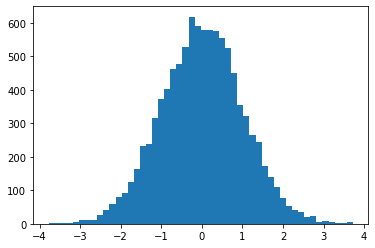

In [190]:
import matplotlib.pyplot as plt

plt.hist(x, bins=50)
plt.show()

- 中位数

In [191]:
np.median(x)

0.006992999137399772

- 均值

In [192]:
x.mean()

0.004101503517847119

In [193]:
np.mean(x)

0.004101503517847119

- 方差

In [194]:
x.var()

1.0017036013672929

In [195]:
np.var(x)

1.0017036013672929

- 标准差

In [196]:
x.std()

1.0008514382101337

In [197]:
np.std(x)

1.0008514382101337

# 题目

## 题目一 简单编程题（numpy数组的创建和性质）

### 1、创建一个4*6的二维数组，元素由0~1之间均匀分布的随机数构成，输出其形状、大小、维度和数据类型

In [1]:
import numpy as np

In [6]:
x = np.random.random((4, 6))
x

array([[0.15684166, 0.04874146, 0.22827836, 0.10141286, 0.02860847,
        0.89489792],
       [0.72110287, 0.56485946, 0.25684811, 0.21345161, 0.56718825,
        0.59274472],
       [0.21531326, 0.15348922, 0.39075755, 0.17819695, 0.82313916,
        0.67923502],
       [0.59064114, 0.73509952, 0.62652101, 0.77545781, 0.62547275,
        0.65484141]])

In [7]:
x.shape

(4, 6)

In [8]:
x.size

24

In [9]:
x.ndim

2

In [10]:
x.dtype

dtype('float64')

### 2、将（1）中的二维数组分别转换为3*8的数组和摊平为一维数组

In [11]:
x.reshape(3, 8)

array([[0.15684166, 0.04874146, 0.22827836, 0.10141286, 0.02860847,
        0.89489792, 0.72110287, 0.56485946],
       [0.25684811, 0.21345161, 0.56718825, 0.59274472, 0.21531326,
        0.15348922, 0.39075755, 0.17819695],
       [0.82313916, 0.67923502, 0.59064114, 0.73509952, 0.62652101,
        0.77545781, 0.62547275, 0.65484141]])

In [13]:
x.flatten()

array([0.15684166, 0.04874146, 0.22827836, 0.10141286, 0.02860847,
       0.89489792, 0.72110287, 0.56485946, 0.25684811, 0.21345161,
       0.56718825, 0.59274472, 0.21531326, 0.15348922, 0.39075755,
       0.17819695, 0.82313916, 0.67923502, 0.59064114, 0.73509952,
       0.62652101, 0.77545781, 0.62547275, 0.65484141])

### 3、创建2个4*4的二维数组，元素整数，随机取自区间[0,10)，请将两个数组分别进行水平拼接和垂直拼接

In [14]:
x = np.random.randint(0, 10, (4, 4))
x

array([[6, 1, 0, 7],
       [5, 6, 9, 7],
       [0, 3, 0, 7],
       [4, 1, 7, 4]])

In [15]:
y = np.random.randint(0, 10, (4, 4))
y

array([[1, 4, 7, 4],
       [8, 7, 6, 4],
       [4, 9, 5, 5],
       [4, 9, 9, 3]])

In [16]:
x1 = np.c_[x, y]
x1

array([[6, 1, 0, 7, 1, 4, 7, 4],
       [5, 6, 9, 7, 8, 7, 6, 4],
       [0, 3, 0, 7, 4, 9, 5, 5],
       [4, 1, 7, 4, 4, 9, 9, 3]])

In [18]:
x2 = np.r_[x, y]
x2

array([[6, 1, 0, 7],
       [5, 6, 9, 7],
       [0, 3, 0, 7],
       [4, 1, 7, 4],
       [1, 4, 7, 4],
       [8, 7, 6, 4],
       [4, 9, 5, 5],
       [4, 9, 9, 3]])

### 4、创建一个16*16的二维数组，其中，数组的外围均为1，内部均为0，提示：用到切片赋值

In [26]:
x = np.zeros((16, 16), dtype=int)
x

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [32]:
x[0] = 1
x[:, 0] = 1
x[-1] = 1
x[:, -1] = 1
x

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

## 题目二 简单编程题（numpy四大运算和通用函数）

### 5、创建一个由10000个元素构成的一维数组，元素随机取自[0,100)

> 求数组元素的均值、方差和标准差；

> 通过 (x-x.mean)/x.std 的方法，将数组归一化；

> 求数组的最大值和最小值，并获取其索引位置；

> 通过 (x-x.min)/(x.max-x.min) 的方法，将数组归一化。

In [33]:
x = np.random.uniform(0, 100, size=10000)

In [34]:
np.median(x)

49.16209710315701

In [35]:
np.var(x)

833.2103774807708

In [36]:
np.std(x)

28.86538372308206

In [37]:
np.mean(x)

49.42417984194438

In [40]:
(x - x.mean())/(x.std())

array([-1.41978246,  0.77440875, -0.11313673, ..., -0.08068301,
        1.01328683, -0.5300226 ])

In [41]:
print(np.max(x), np.argmax(x))
print(np.min(x), np.argmin(x))

99.99623183781814 7749
0.012179035692638784 5386


In [42]:
(x - np.min(x))/(np.max(x) - np.min(x))

array([0.0843078 , 0.71777053, 0.46153626, ..., 0.47090564, 0.7867346 ,
       0.34118136])

### 6、创建一个由30个元素构成的一维数组，元素随机取自[80,100)

> 获得大于等于 95 分的成绩；

> 获得小于等于 85 分的成绩；

> 获得大于 85 分，小于 95 分的成绩；

> 对成绩进行排序。

In [43]:
x = np.random.randint(80, 100, 30)
x

array([93, 96, 87, 84, 89, 81, 88, 87, 87, 95, 95, 94, 97, 97, 81, 95, 98,
       95, 98, 83, 88, 85, 83, 82, 98, 94, 86, 83, 97, 99])

In [45]:
x[x >= 95]

array([96, 95, 95, 97, 97, 95, 98, 95, 98, 98, 97, 99])

In [46]:
x[x <= 85]

array([84, 81, 81, 83, 85, 83, 82, 83])

In [49]:
x[(x < 95)&( x > 85)]

array([93, 87, 89, 88, 87, 87, 94, 88, 94, 86])

In [50]:
np.sort(x)

array([81, 81, 82, 83, 83, 83, 84, 85, 86, 87, 87, 87, 88, 88, 89, 93, 94,
       94, 95, 95, 95, 95, 96, 97, 97, 97, 98, 98, 98, 99])

### 7、构建两个3*3的二位列表A和B

- （1）乘法运算

> 用Python for循环实现A*B的乘法运算；

> 用Numpy实现A*B的乘法运算；

> 对比两种实现方法的运行时间。

- （2）矩阵乘法

> 用Python for循环实现A和B的矩阵乘法；

> 用Numpy实现A和B的矩阵乘法；

> 对比两种实现方法的运行时间。

- （3）对比矩阵乘法和乘法运算的不同

In [1]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
B = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [52]:
len(A)

3

In [53]:
def py_num_mul():
    for i in range(3):
        for j in range(3):
            A[i][j] =  A[i][j] * B[i][j]
            

%timeit py_num_mul()

The slowest run took 4.72 times longer than the fastest. This could mean that an intermediate result is being cached.
302 µs ± 132 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [15]:
import numpy as np

A = np.array(A)
B = np.array(B)

In [8]:
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [9]:
B

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [10]:
%timeit A*B

537 ns ± 17.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
A*B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

In [12]:
%timeit A.dot(B)

885 ns ± 16.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [16]:
A.dot(B)

array([[ 24,  30,  36],
       [ 51,  66,  81],
       [ 78, 102, 126]])

In [17]:
A = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
B = [[0, 1, 2], [3, 4, 5], [6, 7, 8]]

In [18]:
def py_num_mamul():
    for i in range(3):
        for j in range(3):
            A[i][j] = A[i][0]*B[0][j] + A[i][1]*B[1][j] + A[i][2]*B[2][j]
            

%timeit py_num_mamul()

The slowest run took 4.17 times longer than the fastest. This could mean that an intermediate result is being cached.
447 µs ± 184 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
